Valores atípicos: [1.32, 1.37]


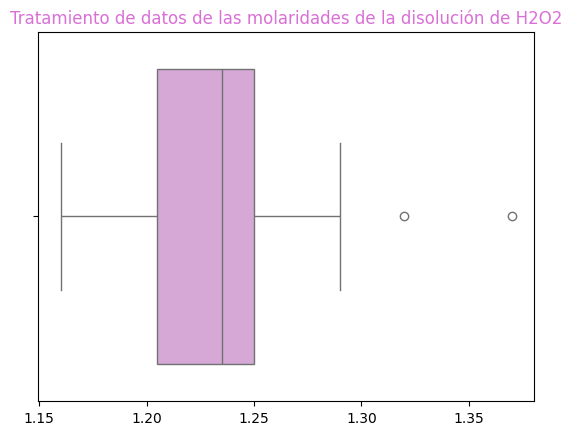

Datos evaluados:[1.24, 1.22, 1.16, 1.24, 1.22, 1.18, 1.25, 1.23, 1.29, 1.25, 1.32, 1.18, 1.37, 1.2]


In [27]:
#Tratamiento de datos por método Tukey
#importar bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def tratar_datos_por_tukey(datos_muestra): #definir una función para el tratamiento de datos
    diagrama_caja = sns.boxplot(x=datos_muestra, color="plum")#crear un diagrama de caja con Seaborn
    
    #Mostrar estadísticas de resumen utilizando Pandas
    df = pd.DataFrame(datos_muestra, columns=["Datos"])
    descripcion = df.describe()

    # Calcular y mostrar valores atípicos
    cuartil_1 = descripcion.at["25%", "Datos"] #calcular el cuartil 1 de los datos
    cuartil_3 = descripcion.at["75%", "Datos"] #calcular el cuartil 3 de los datos
    rango_intercuartil = cuartil_3 - cuartil_1

    atipicos = [valor for valor in datos_muestra if valor < cuartil_1 - 1.5 * rango_intercuartil or valor > cuartil_3 + 1.5 * rango_intercuartil] #crear un arreglo que incluya datos que esten por encima del rango intercuartílico extendido
    
    if atipicos: #condición si hay valores atípicos
        print("Valores atípicos:", atipicos)
    else: #condición si no hay valores atípicos
        print("No hay valores atípicos.")
    return diagrama_caja

if __name__ == "__main__": #definir la función main
    nombre_diagrama_caja = input("Ingrese el nombre que le quiere dar al diagrama de caja: ")
    #crear arreglo vacío con los datos que necesitan ser tratados
    datos_muestra = []
    
    while True: #pedirle al usuario los datos que quiere tratar con el ciclo for hasta que ponga un 0 como dato
        dato = float(input("Ingrese el dato de la muestra o ingrese 0 para salir: "))
        datos_muestra.append(dato) #añadir el dato al arreglo
        if dato == 0: #cuando el usuario ingrese 0 en el dato, el ciclo termina
            datos_muestra.pop(-1) #eliminar el 0 del arreglo
            break
    
    diagrama = tratar_datos_por_tukey(datos_muestra)#llamar a la función que realiza el tratamiento de los datos
    
    plt.title(nombre_diagrama_caja, color="orchid")
    plt.show(diagrama)#mostrar diagrama de caja
    print("Datos evaluados:"+str(datos_muestra)) #imprimir arreglo con los datos evaluados

In [14]:
#Precisión en una muestra de datos
import numpy as np

def calcular_precision(datos_muestra_1): #definir la función para calcular la precisión
    desviacion_estandar = np.std(datos_muestra_1) #calcular desviación estándar
    return desviacion_estandar

def calcular_exactitud(datos_muestra_1, valor_real:float): #definir la función para calcular la exactitud
    promedio_1 = np.mean(datos_muestra_1) #calcular el promedio de los datos
    error_absoluto = abs(valor_real - promedio_1) #calcular el error absoluto
    error_relativo = error_absoluto / valor_real #calcular el error relativo
    error_porcentual = error_relativo * 100 #calcular el error porcentual
    return error_porcentual

if __name__ == "__main__": #definir la función main
    #crear arreglo vacío con los datos que van a evaluarse
    datos_muestra_1 = []
    
    while True: #pedirle al usuario los datos que quiere evaluar con el ciclo for hasta que ponga un 0 como dato
        dato = float(input("Ingrese el dato de la muestra o ingrese 0 para salir: "))
        datos_muestra_1.append(dato) #añadir el dato al arreglo
        if dato == 0: #cuando el usuario ingrese 0 en el dato, el ciclo termina
            datos_muestra_1.pop(-1) #eliminar el 0 del arreglo
            break
    
    valor_real = float(input("Ingrese el valor real: "))
    unidad = input("Ingrese la unidad de medida de sus datos: ")

    precision = calcular_precision(datos_muestra_1) #llamar a la función que realiza el cálculo de la precisión
    exactitud = calcular_exactitud(datos_muestra_1, valor_real) #llamar a la función que realiza el cálculo de la exactitud
    
    print(f"La precisión de los datos es de {precision} {unidad}.")
    print(f"La exactitud de los datos es de un {exactitud}%")

La precisión de los datos es de 0.05576790449351346 M.
La exactitud de los datos es de un 3.5256410256410504%
